# The Bouncing Ball introduction to Modeling and Simulation
Last week we spend a great deal of time in the class discussing the bouncing
ball model, Julia, and different ways of modeling as well and writing Julia
code. In the notebook we intend the wrap up the discussion about that particular
model and what we can learn from it as we approach other modeling and simulation
tasks. 

## The physics of a bouncing ball

From our basic classroom physics we know that a ball in a state of rest (i.e. zero velocity) that 
is released from height $h_0$ will drop towards the ground with acceleration with an acceleration 
due to gravity $g$, that usually has the value of $9.81 m/s^2$. However, when making that 
simple statement we must be aware of the implicit assumptions that this entails: 
- There are no fluid effects such as *bouyancy* or *drag*. 
- We are on planet earth and somewhere near its surface, and on an altitude and latitude 
    where $g=9.81 m/s^2$ is an okay approximation 
    (we know that is on our planet is could anywhere from $9.764 m/s^2$ to $9.834 m/s^2$). 
- The diameter, mass, and color of the ball does not matter
- The ball is perfectly spherical and the ground is perfectly flat and level (so that when dropped from rest, it will bounce perfectly upwards) 

<span style="color:red">**Lesson 1: Always state your assumptions**</span>

Having stated our assumption we now proceed with the equations of motion. We
know that a ball dropped from rest (in a vacuum, or with negligible fluid
effects), will be subject to [constant translational acceleration in a straight
line](https://en.wikipedia.org/wiki/Equations_of_motion#Uniform_acceleration).

Hence 
$$v=v_0-g t$$
Here $v$ is the vertical velocity, and v_0 is the initial vertical velocity. Our coordinate system is oriented such that
the positive sense is away from the surface of the earth, hence the -ve effect
of earth's acceleration. We can integrate the above equation to find the hight
of the ball. It will come to 
$$h=h_o+v_0t -\frac{1}{2}gt^2$$
Where $h$ is the vertical hight above ground and $h_0$ is the initial hight. 
We know that when the ball hits the ground, it will lose some energy on the
bounce. This can be expressed as
$$v_a=-c v_b$$
Where $v_b$ is the velocity immediately prior to collision, $v_a$ is the velocity immediately after collision,and  $c$ is the [coefficient or restitution](https://en.wikipedia.org/wiki/Coefficient_of_restitution). 

## The Model of the bouncing ball
We have to be careful here stating the governing equations does not fully
capture the model. We have to be aware of the _discontinuities_ that happen in
our model. Things change before and after each bounce. 

We start by considering what happens in when we release the ball from rest up
up until it hits the ground. Since it is released from the question for velocity
will be simplified to 
$$v=-g t$$ 
and for the height, it will be 
$$h=h_o-\frac{1}{2}gt^2$$
We know it will hit the ground when $h=0$. A bit of algebra, will show us that
it hit ground at time 
$$t_1=\sqrt{\frac{2h_0}{g}}$$
The subscript $t_i$ indicates the $i$th time the ball will hit the ground. The
velocity immediately before the bounce, will hence be 
$$v_b=-gt_1=-\sqrt{2h_0g}$$. The velocity immediately after the first bounce
will be 
$$v_1=c\sqrt{2h_0g}$$
where $v_i$  is the vertical velocity after the $i$th bounce. 

It is important to note that after the bounce the is change of force therefore a
discontinuity in the meaning of time in equations of motion. The equations stated in the previous
section will still hold, however the time $t$ will _reset_. Hence after the
bounce 
$$v=v_1-g t$$
and 
$$h=v_1t -\frac{1}{2}gt^2$$
where the time variable $t$ above denotes the time _after_ $t_1$. If we prefer
to express the equations of motion in absolute time time after the ball has been
released, we can write the above two equations as 
$$v=v_1-g (t-t_1)$$
and 
$$h=v_1(t-t_1) -\frac{1}{2}g(t-t_1)^2$$

We can now substitute $h=0$ is and we find 
$$t_2-t_1=\frac{2v_1}{g}$$
also 
$$v_2=c v_1$$

We can express this in very general terms as 
$$t_{i+1}-t_i=\frac{2v_i}{g}$$
and 
$$v_{i+1}=c v_i=c^iv_1$$
Also in general term, we can rewrite the equation of motions as 
$$h(t)=\begin{cases}
    h_o-\frac{1}{2}gt^2,& \text{if } 0<t\leq t_1\\
    v_i(t-t_i) -\frac{1}{2}g(t-t_i)^2,& \text{for } t_i<t\leq t_{i+1}
\end{cases}$$
In conclusion, we only need to calculate $t_1$ and $v_1$ to start with, then we
need to calculate all subsequent $v_i$s and $t_i$s and used the appropriate
equation for the hight calculation.  We are now ready to start doing our
simulation. 

## Bouncing Ball Simulation

In [1]:
using Winston # For plotting

In [ ]:
"""
Given initial hight h0 and coefficient or restitution c, the function 
will generate a vector of ball postions up until time end_t. 
"""
function bouncingBallPositon1(h0,c,end_t, delta=0.01)
    g=9.81 # we will have this fixed
    t1=ti=t_next=sqrt(2*h0/g)
    vi=sqrt(2*h0*g) #Just before the bounce 
    time_range=0:delta:end_t
    h_vec=zeros(length(time_range)) #The hight vector 
    i=1 # Array Index
    for t in time_range
        if tl<=t1
            h_vec[i]=h0-0.5*g*t^2
        else
            if t>t_next #t_next is t_{i+1} in the equations
                ti=t_next
                vi*=c
                t_next+=2*vi/g
            end
            h_vec[i]=vi*(t-ti)-0.5*g*(t-ti)^2
        end
        i+=1 # Incrementing the array counter 
    end
    h_vec # return the vector of heights 
end

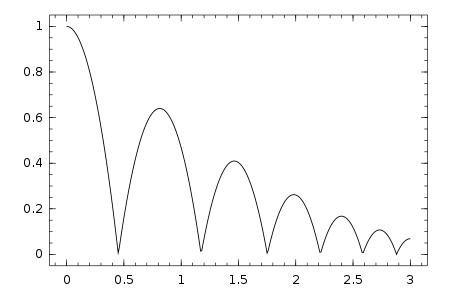

In [3]:
h_vec=bouncingBallPositon1(1,0.8,3.0)
plot(0:0.01:3,h_vec)

## Lab tasks
- What is the _qualitative_ relationship between drop in hight after each bounce and $c$? 
- Plot the drop in maximum hight over time for a given $c$ and h. 
- Plot the relationship between $c$ and the time it take for the ball ball to have a maximum hight less that 1cm
- Plot the relationship between $h_0$ and the time it take for the ball ball to have a maximum hight less that 1cm